In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot


In [51]:
data=pd.read_csv("train.csv")

In [52]:
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.605397,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,0,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,61.035288,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1,1,1,1,1,1,1,1,1,1,42.084907,0,0,1,1
796,1,1,0,0,1,0,0,0,1,1,17.669291,0,0,0,0
797,0,0,0,0,0,0,1,0,1,1,18.242557,1,1,0,1
798,1,1,1,1,1,1,0,1,1,1,19.241473,0,0,1,0


In [53]:
df=data

In [54]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.605397,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,0,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,61.035288,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,1,0,1,0


## Below is the columns description of the datasets

### Features
##### A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
##### age - Age of the patient in years
##### gender - Gender of the patient
##### jaundice - Whether the patient had jaundice at the time of birth
##### autism - Whether an immediate family member has been diagnosed with autism

### Target
##### Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [55]:
ASD_pos = df[df['Class/ASD']==1]
ASD_neg = df[df['Class/ASD']==0]

In [56]:
ASD_pos.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,Class/ASD
2,1,1,1,1,1,1,0,0,1,1,14.679893,0,0,0,1
8,1,1,1,1,1,1,1,1,1,0,20.305943,0,1,0,1
9,0,0,0,0,0,0,1,1,0,1,17.964599,0,1,0,1
12,1,0,1,1,1,1,1,1,1,1,29.112066,0,1,1,1
15,1,1,0,0,1,0,0,0,0,0,36.084360,0,1,0,1


In [57]:
ASD_neg.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jaundice,austim,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,18.605397,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,61.035288,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,1,0,1,0
5,1,0,0,0,0,0,0,1,0,0,15.578191,1,0,0,0


In [58]:
# fix the spelling issue 
train = df.rename(columns = {'austim': 'autism'}, errors="raise")

In [59]:
train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'autism', 'Class/ASD'],
      dtype='object')

In [60]:
df=train

In [61]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'jaundice', 'autism', 'Class/ASD'],
      dtype='object')

### Count plot

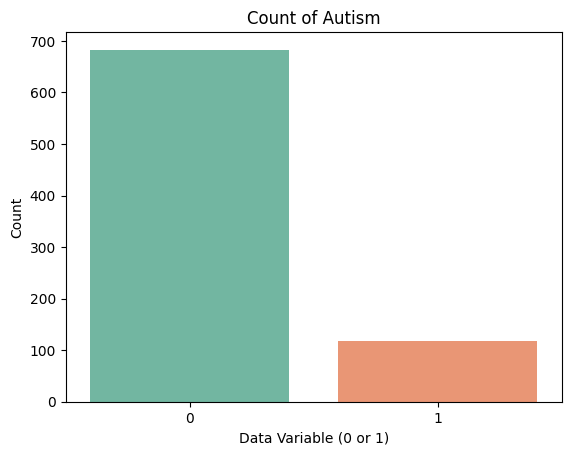

In [18]:
sns.countplot(x='autism', data=df, palette='Set2')
plt.title('Count of Autism')
plt.xlabel('Data Variable (0 or 1)')
plt.ylabel('Count')
plt.show()

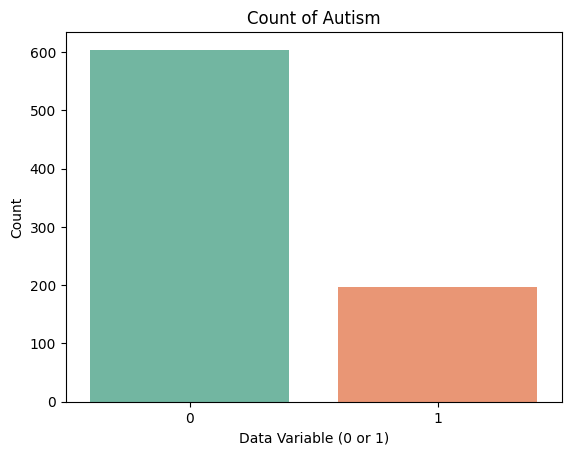

In [19]:
sns.countplot(x='jaundice', data=df, palette='Set2')
plt.title('Count of Autism')
plt.xlabel('Data Variable (0 or 1)')
plt.ylabel('Count')
plt.show()

### Histogram

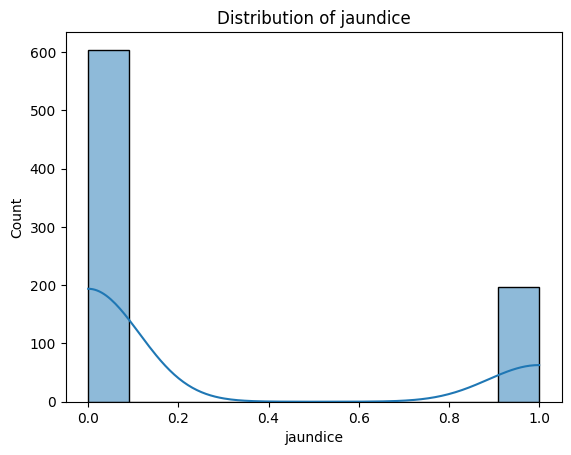

In [23]:
# Visualize a Histogram of jaundice
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.histplot(df['jaundice'], kde=True)
plt.title('Distribution of jaundice')
plt.xlabel('jaundice')
plt.show()

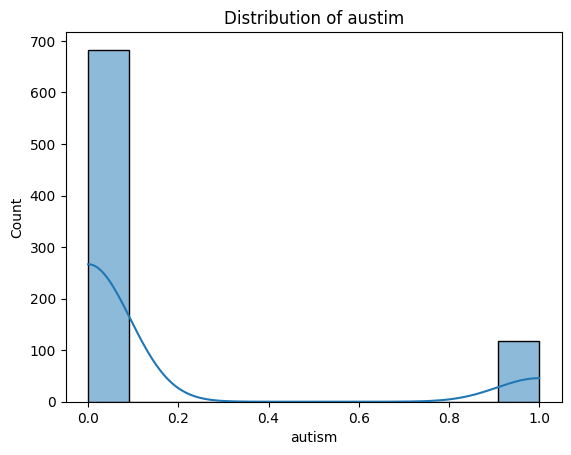

In [24]:
# Visualize a Histogram of austim
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['autism'], kde=True)
plt.title('Distribution of austim')
plt.xlabel('autism')
plt.show()

### Bar plot

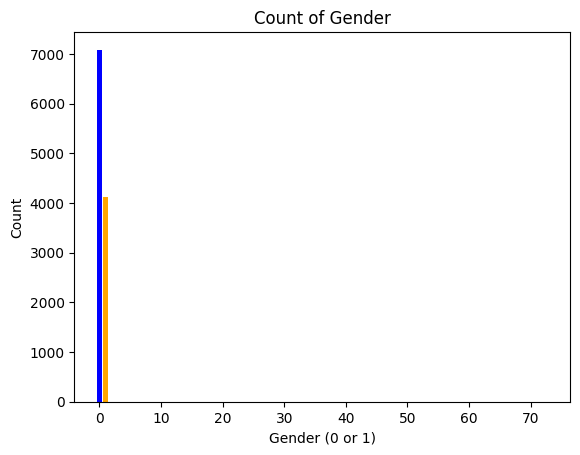

In [25]:
# Count the unique values
import numpy as np
values, counts = np.unique(df, return_counts=True)

# Bar plot
plt.bar(values, counts, color=['blue', 'orange'])
plt.title('Count of Gender')
plt.xlabel('Gender (0 or 1)')
plt.ylabel('Count')
#plt.xticks(values, labels=['0', '1'])  # Customize labels if needed
plt.show()

### Pie chart

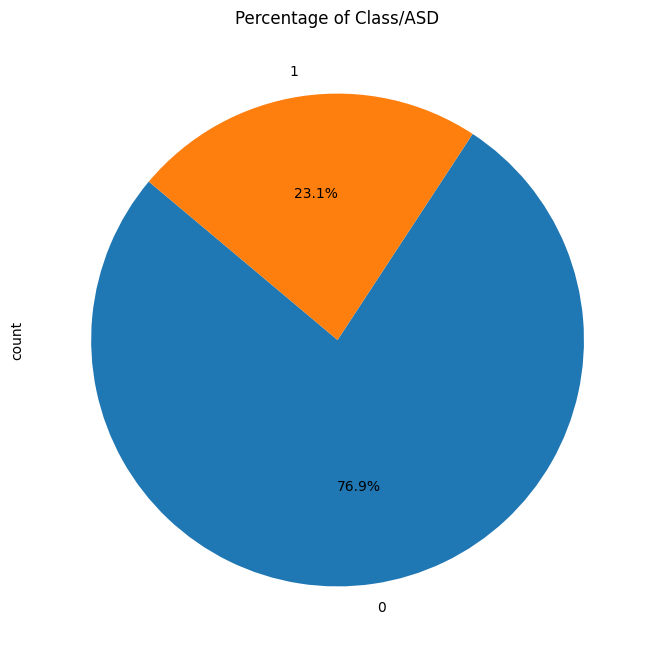

In [26]:
# Pie chart
plt.figure(figsize=(8, 8))
df['Class/ASD'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Class/ASD')
plt.show()

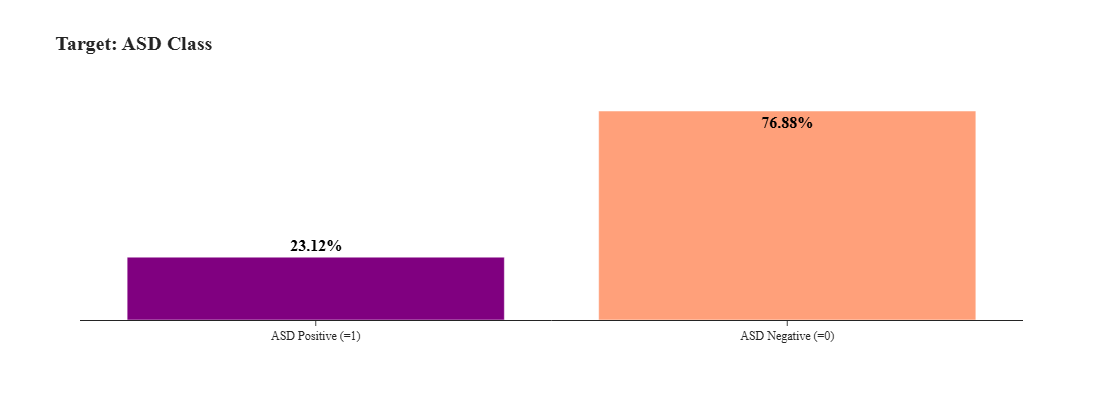

In [29]:
import numpy as np
label = ['ASD Positive (=1)', 'ASD Negative (=0)']
value = [ASD_pos.shape[0], ASD_neg.shape[0]] 
pct = [value[0]*100/len(df), value[1]*100/len(df)]


fig = go.Figure(data=[go.Bar(
            y=value, x=label,
            text=(np.round(pct,2)),
            textposition=['outside', 'inside'],
            texttemplate = ["<b style='color: #f'>%{text}%</b>"]*2,
            textfont=dict(  family="sans serif",
                            size=16,
                            color="black"),
            orientation='v',
            marker_color=['purple', 'lightsalmon'],
            opacity=1.0,
                    )])
fig.update_layout(title='<b>Target: ASD Class <b>', 
                  font_family="San Serif",
                  template= 'simple_white',
                  yaxis_linewidth=2.5,
                  width=600, 
                  height=400,
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 20},
                  )
fig.update_xaxes(showgrid=False, showline=True)
fig.update_yaxes(showgrid=False, showline=False, showticklabels=False, ticks='')
fig.show()

## Features distribution¶
### Target : ASD Class
### Around 77% of the target is ASD negative (0) and 23% ASD positive (1)
#### Target class is imbalanced.

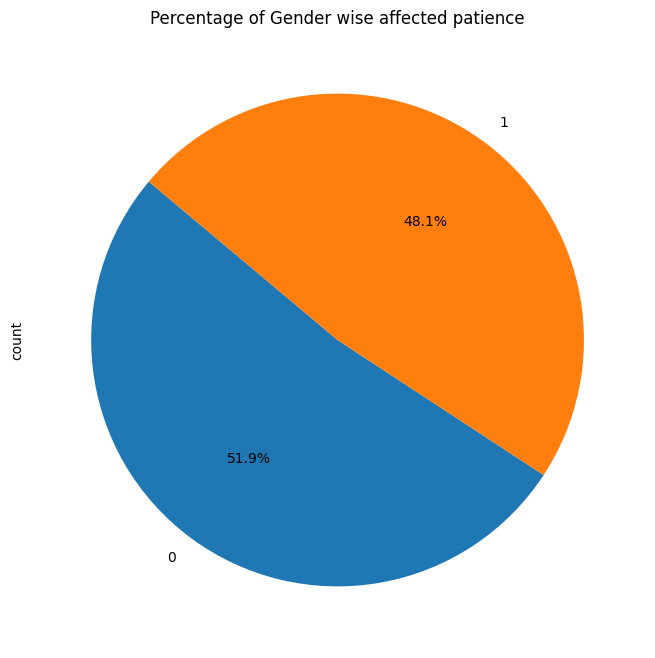

In [30]:
# Pie chart
plt.figure(figsize=(8, 8))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Gender wise affected patience')
plt.show()

### Gender distribution is fairly balanced. 52% are Females (f) and the remaining 48% are males (m)
### 63% of ASD_positive are females.

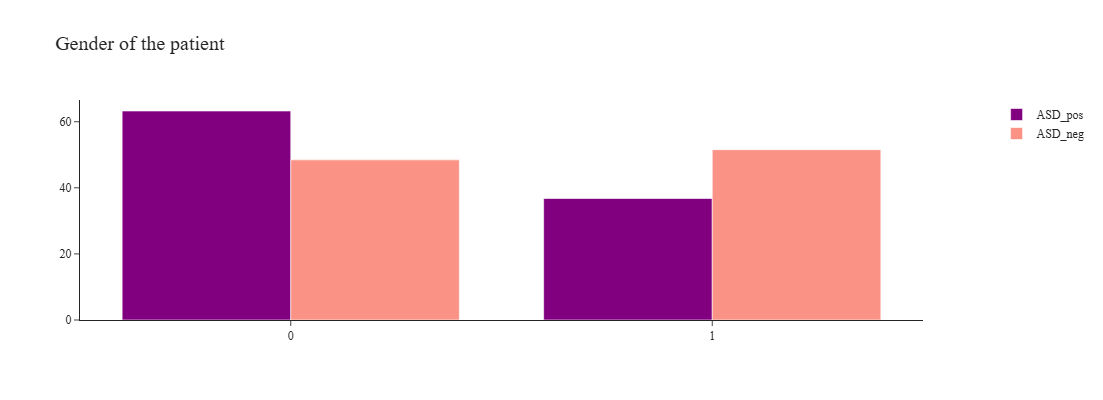

In [42]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['gender'],histnorm='percent',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['gender'],histnorm='percent',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="Gender of the patient", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.20, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending')
fig.show()

In [41]:
#!pip install plotly

### Jaundice


The majority of the patients had no jaundice at birth
Of those who had jaundice at birth, the majority (123) had tested ASD_negative compared to the 73 positive cases. Jaundice at birth may not mean ASD positivity.


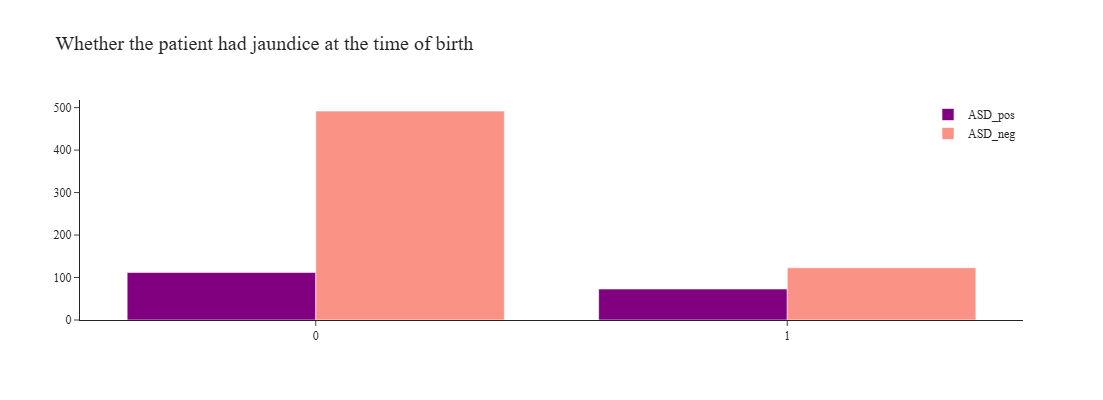

In [32]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['jaundice'],histnorm='',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['jaundice'],histnorm='',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="Whether the patient had jaundice at the time of birth", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show()


### Autism in the family
Most patients have no immediate family who have been diagnose for autism.
However, those who have autistic family members are likely to be diagnose with autism. 72 out of 117 (i.e 62%) of the ASD_positive patients have family members with autism.

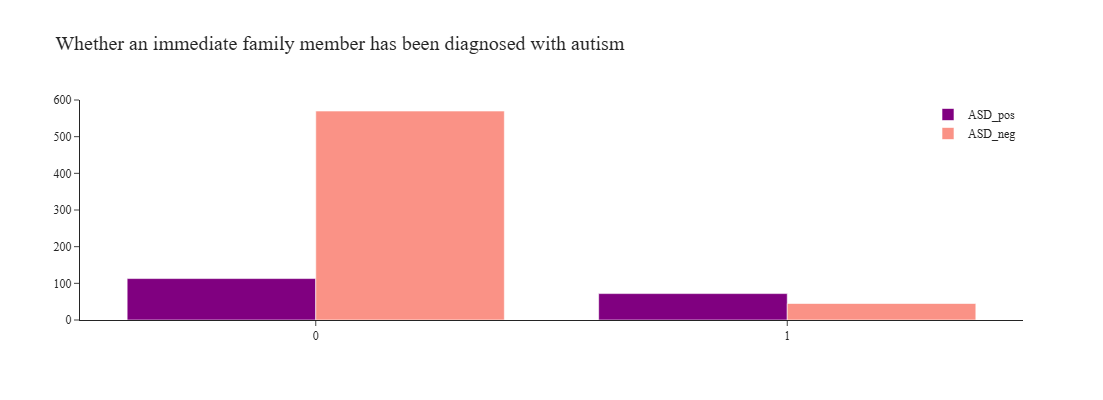

In [37]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['autism'],histnorm='',
              name='ASD_pos', marker_color = 'purple'),
              )
fig.add_trace(go.Histogram(x=ASD_neg['autism'],histnorm='',
              name='ASD_neg', marker_color = 'salmon', opacity=0.85),
             )  

fig.update_layout(title="Whether an immediate family member has been diagnosed with autism", 
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600, 
                  height=400,
                  legend=dict(
                  orientation="v", y=1, yanchor="top", x=1.0, xanchor="right" )                 
                 ).update_xaxes(categoryorder='total descending') 

fig.show()

### Age Distribution
ASD_positive:
average age is 32; the min is 10.9 years; and the maximum is 71.1 years

ASD_negative
average age is 27.6; the min is 9.6 years; and the maximum is 72.4 years

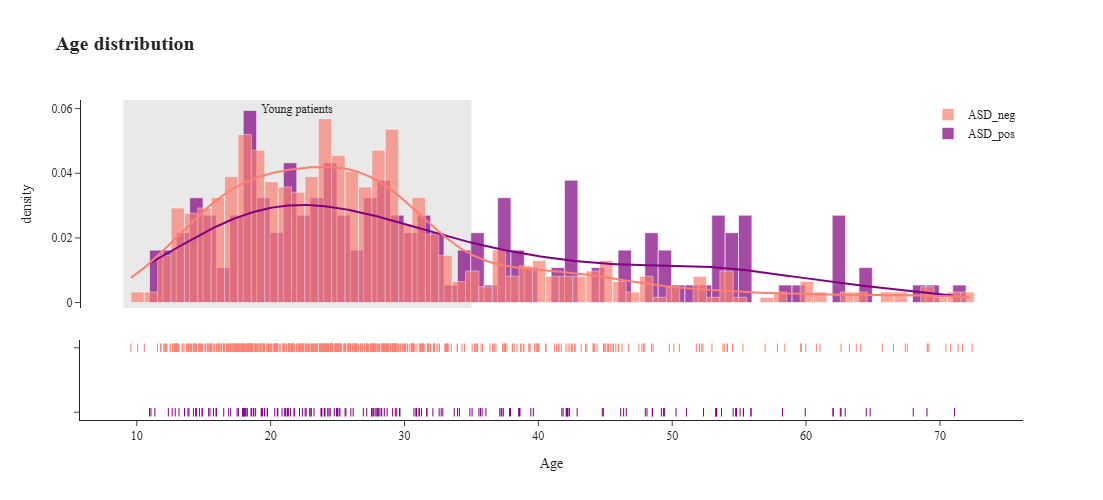

In [38]:
group_labels = ['ASD_pos', 'ASD_neg']
fig = ff.create_distplot([ASD_pos['age'], ASD_neg['age']],
                         group_labels, 
                         show_hist=True, 
                         show_rug=True,
                         colors=['purple', 'salmon'],
                         )
fig.update_layout(title='<b>Age distribution<b>',
                  xaxis_title='Age',
                  yaxis_title='density',
                  titlefont={'size': 20},
                  font_family = 'San Serif',
                  width=700,height=500,
                  template="simple_white",
                  showlegend=True,
                  legend=dict(
                      orientation="v",
                      y=1, 
                      yanchor="top", 
                      x=1.0, 
                      xanchor="right",
                  )
                 )
fig.add_vrect(
    x0=9, x1=35,
    annotation_text="Young patients", annotation_position="top",
    fillcolor="lightgray", opacity=0.5,
    layer="below", line_width=0,
),
fig.show()

### Screening Test scores (QA1-10)
The QA test scores looks binary (they are either 1 or 0).
Most of the questions except A8_score and (slightly) A1_scores, most of the screening question have fairly separated the positive and negative cases.

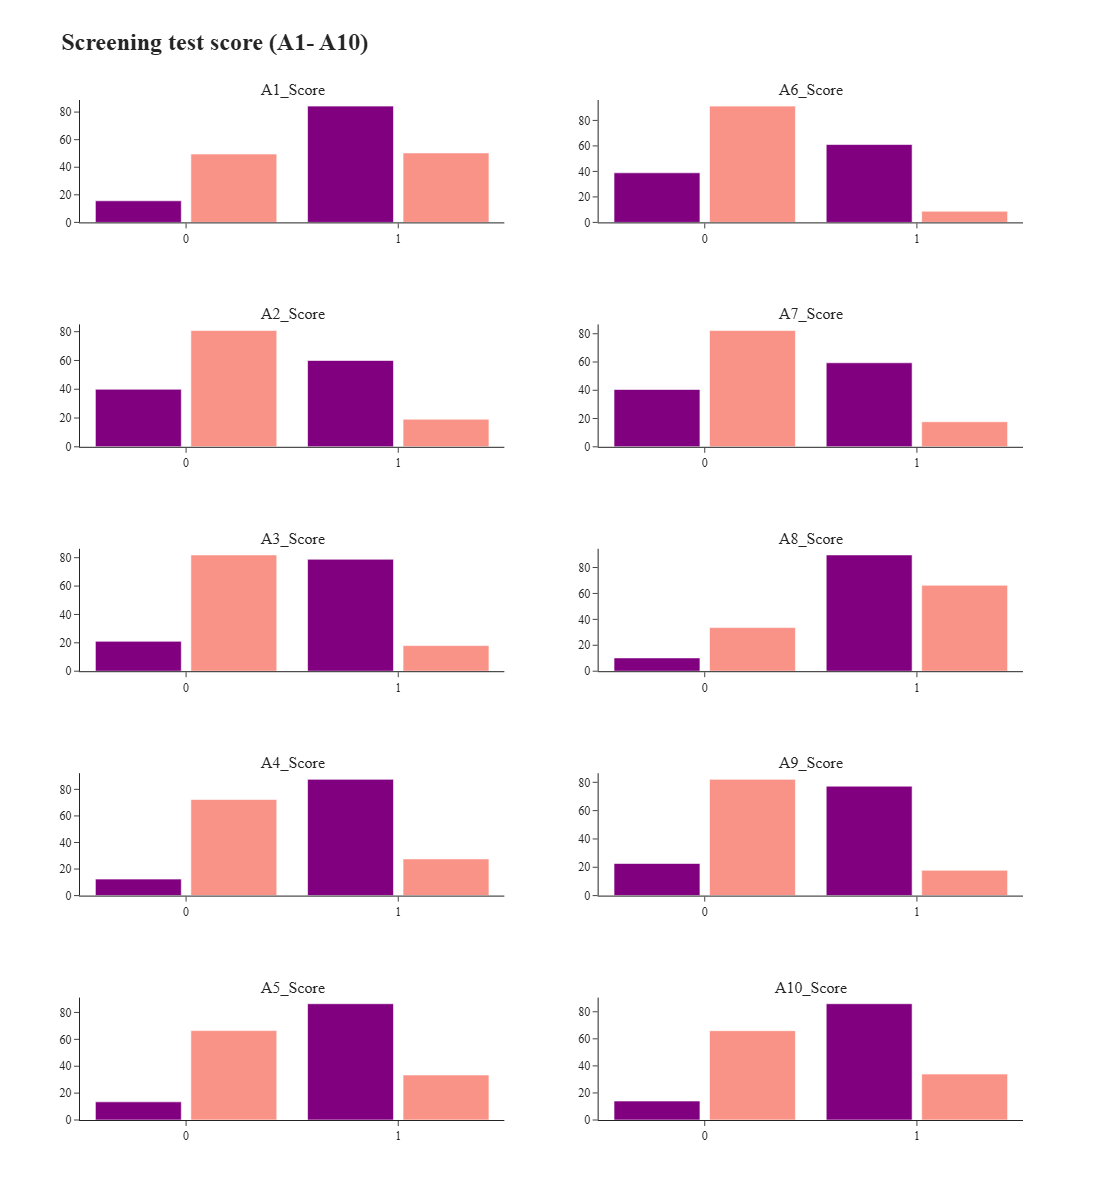

In [40]:
# Define num_cols
num_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']

fig = make_subplots(rows=5, cols=2,
                   subplot_titles=('A1_Score','A6_Score', 'A2_Score', 'A7_Score','A3_Score', 
                                   'A8_Score','A4_Score','A9_Score', 'A5_Score','A10_Score',
                                   ))     

for i, feat in enumerate(num_cols[0:5]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat],histnorm='percent',
                  name='ASD_pos', marker_color = 'purple'),
                  row=i+1, col=1)
    fig.add_trace(go.Histogram(x=ASD_neg[feat],histnorm='percent',
                  name='ASD_neg', marker_color = 'salmon', opacity=0.85),

                 row=i+1, col=1)    
    fig.update_layout(barmode='overlay')
                           
for j, feat in enumerate(num_cols[5:12]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat],histnorm='percent',
                  name='ASD_pos', marker_color = 'purple'),
                 row=j+1, col=2)
    fig.add_trace(go.Histogram(x=ASD_neg[feat],histnorm='percent',
                  name='ASD_neg', marker_color = 'salmon', opacity=0.85),
                 row=j+1, col=2)    
    fig.update_layout(barmode='overlay')

fig.update_layout(title=" <b> Screening test score (A1- A10) <b>",
                      font_family="San Serif",
                      titlefont={'size': 24},
                      width=900, height=1200,
                      template='simple_white',
                      showlegend=False,
                      bargap=0.1, 
                      bargroupgap=0.1
                     )

fig.update_layout(barmode='group')
fig.show()


### Correlation heatmap (numerical features)¶
From the numerical features only result shows moderate correlation with target Class/ASD


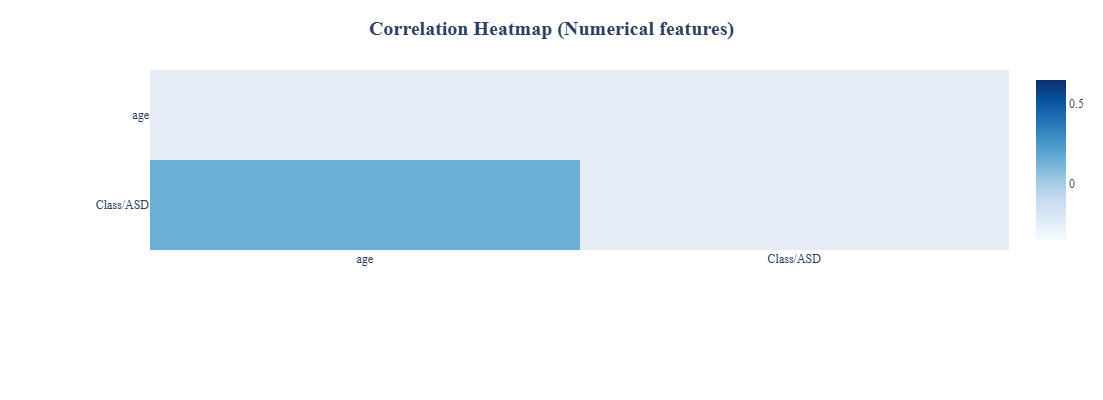

In [43]:
x = ['age', 'Class/ASD']
df = df[x]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = corr.mask(mask)


fig = go.Figure(data= go.Heatmap(z=corr,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 colorscale='Blues',                                  
                                 )
                )
fig.update_layout(title_text='<b>Correlation Heatmap (Numerical features)<b>',
                  font_family="San Serif",
                  title_x=0.5,
                  titlefont={'size': 20},
                  width=450, height=400,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                                    autosize=False,
                  margin=dict(l=150,r=50,b=150,t=70,pad=0),
                  )
fig.show()

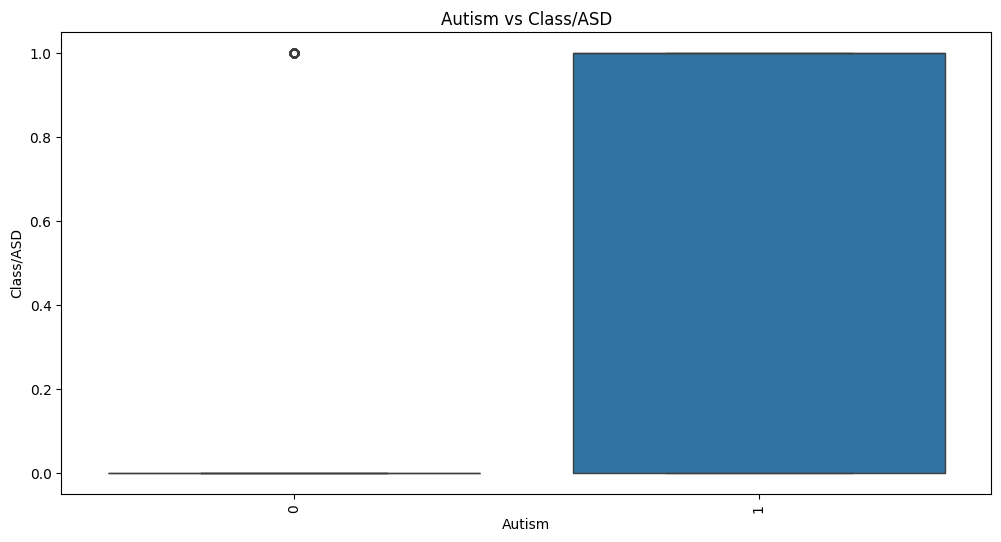

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='autism', y='Class/ASD', data=df)
plt.title('Autism vs Class/ASD')
plt.xlabel('Autism')
plt.ylabel('Class/ASD')
plt.xticks(rotation=90)
plt.show()

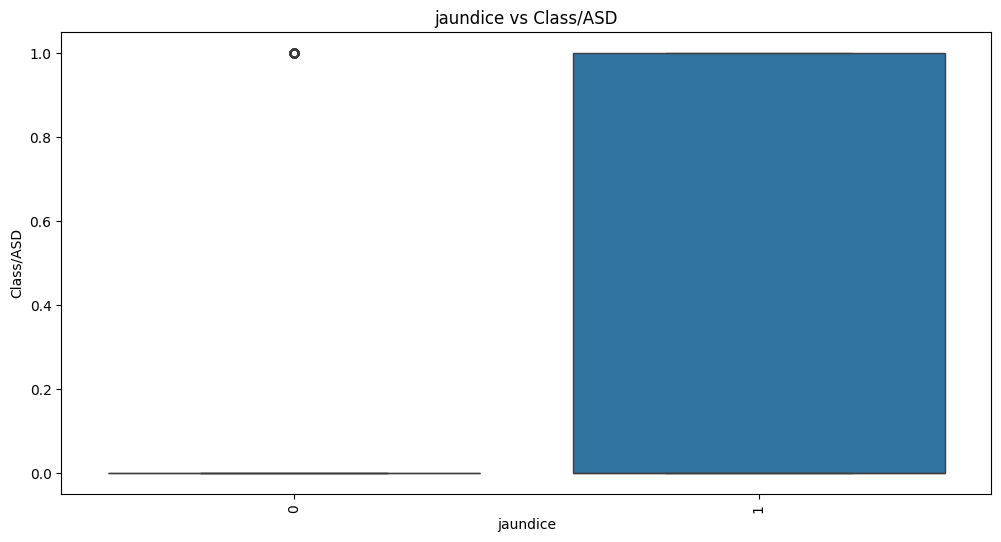

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='jaundice', y='Class/ASD', data=df)
plt.title('jaundice vs Class/ASD')
plt.xlabel('jaundice')
plt.ylabel('Class/ASD')
plt.xticks(rotation=90)
plt.show()

### Correlation heatmap (categorical features)
###### We use Cramer's V correlation coefficient.
###### We see that A3_Score, A6_Score, A9_Score and ethnicity are moderately correlated with the target (Class/ASD).
###### We also notice that A1_Score and A8_Score have weak correlation with the target.
###### Previous participation in screening programme (used_app_before) has no correlation with any other features or target.

In [64]:
# the cramers_v function is copied from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def plot_carmersV_corr(df):
    rows= []
    for x in df:
        col = []
        for y in df :
            cramers =cramers_v(df[x], df[y])
            col.append(round(cramers,2))
        rows.append(col)

    cramers_results = np.array(rows)
    df_corr = pd.DataFrame(cramers_results, columns = df.columns, index = df.columns)

    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    df_corr = df_corr.mask(mask)


    fig = go.Figure(data= go.Heatmap(z=df_corr,
                                     x=df_corr.index.values,
                                     y=df_corr.columns.values,
                                     colorscale='purples',                                  
                                     )
                    )
    fig.update_layout(title_text='<b>Correlation Heatmap (Categorical features) <b>',
                      font_family="San Serif",
                      title_x=0.5,
                      titlefont={'size': 20},
                      width=750, height=700,
                      xaxis_showgrid=False,
                      xaxis={'side': 'bottom'},
                      yaxis_showgrid=False,
                      yaxis_autorange='reversed',                   
                                        autosize=False,
                      margin=dict(l=150,r=50,b=150,t=70,pad=0),
                      )
    fig.show()
    
plot_carmersV_corr(train.drop(['age', 'result'], axis=1))

KeyError: "['result'] not found in axis"

### Short conclusion (EDA)
##### Target is imbalanced.
##### One feature (country of residence) has different uniques values in train and test dataset.
##### Having Jaudice at birth seem to have no major influence on autism. However, family history seem to have correlation with autism diagnose.